In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
fldr="./UTkFace"

In [3]:
import os
files=os.listdir(fldr)

### Create List of Age, Gender and Image from the dataset

In [4]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    ages.append(age)
    
    gender = int(fle.split('_')[1])
    genders.append(gender)
    
    total = fldr + '/' + fle
    print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

### Viewing a sample

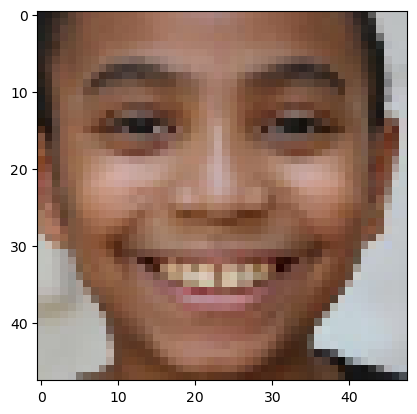

In [5]:
plt.imshow(images[87])

In [6]:
print(ages[87])

10


In [7]:
print(genders[87])

0


### Convert images array, ages array and genders array

In [8]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

### Finding the no. of Male and Female samples respectively

In [9]:
values, counts = np.unique(genders_f, return_counts = True)
print(values)
print(counts)

[0 1]
[12391 11317]


### Finding The no. of samples in each age

In [10]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


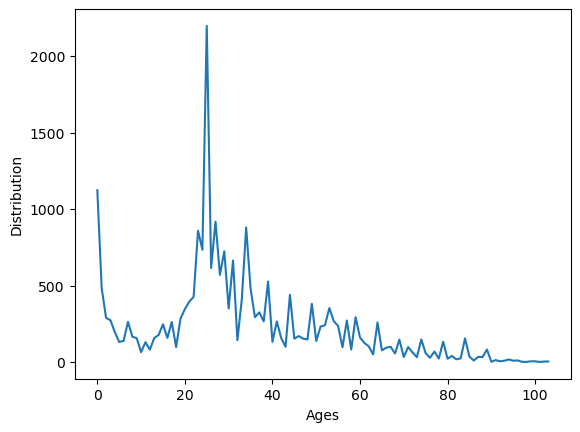

In [11]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

### Definig Labels for Output

In [12]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [13]:
labels_f=np.array(labels)

### Normalize pixel values to be in the range [0, 1]

In [14]:
images_f_2=images_f/255

### Splitting The Dataset into test and train

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2, labels_f, test_size=0.25)

In [16]:
Y_train[0:5]

array([[32,  1],
       [37,  1],
       [58,  1],
       [28,  1],
       [ 3,  0]])

In [17]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [18]:
Y_train_2[0][0:5]

array([1, 1, 1, 1, 0])

In [19]:
Y_train_2[1][0:5]

array([32, 37, 58, 28,  3])

In [20]:
Y_train_2

[array([1, 1, 1, ..., 1, 1, 0]), array([32, 37, 58, ..., 52, 40, 23])]

### Defining the Model

In [21]:
def model(input_shape):
    inputs=Input((input_shape))
    
    # First convolutional layer with ReLU activation, MaxPooling, and Dropout
    conv1=Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(inputs)
    act1=Activation('relu')(conv1)
    maxp1=MaxPooling2D(pool_size=(2,2))(act1)
    drop1=Dropout(0.1)(maxp1)
    
    # Second convolutional layer with ReLU activation, MaxPooling, and Dropout
    conv2=Conv2D(filters=64,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(drop1)
    act2=Activation('relu')(conv2)
    maxp2=MaxPooling2D(pool_size=(2,2))(act2)
    drop2=Dropout(0.1)(maxp2)
    
    # Third convolutional layer with ReLU activation, MaxPooling, and Dropout
    conv3=Conv2D(filters=128,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(drop2)
    act3=Activation('relu')(conv3)
    maxp3=MaxPooling2D(pool_size=(2,2))(act3)
    drop3=Dropout(0.1)(maxp3)
    
    # Fourth convolutional layer with ReLU activation, MaxPooling, and Dropout
    conv4=Conv2D(filters=256,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(drop3)
    act4=Activation('relu')(conv4)
    maxp4=MaxPooling2D(pool_size=(2,2))(act4)
    drop4=Dropout(0.1)(maxp4)
    
    # Flatten the output from the last convolutional block
    flatten = Flatten()(drop4)

    # Fully connected layers with Dropout and output layers
    dense1 = Dense(64, activation='relu')(flatten)
    drop5 = Dropout(0.2)(dense1)
    output1 = Dense(1, activation='sigmoid', name='sex_out')(drop5)
    
    dense2 = Dense(64, activation='relu')(flatten)
    drop6 = Dropout(0.2)(dense2)
    output2 = Dense(1, activation='relu', name='age_out')(drop6)
    
    # Create the model
    model=Model(inputs=[inputs], outputs=[output1,output2])
    
    # Compile the model
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    
    return model

In [22]:
Model=model((48,48,3))

In [23]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24, 24, 32)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 12, 12, 64)        │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 6, 6, 128)         │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 3, 3, 256)         │               0 │ activation_3[0][0]         │
│ (MaxPooling2D)                │                           │               

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

### Initializing the Model

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights='True')
callback_list=[checkpoint, Early_stop]

### Running the Model

In [25]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test,Y_test_2), epochs=250, callbacks = callback_list,verbose=1)

Epoch 1/250


C:\Users\Satish Patil\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 3))
  warnings.warn(msg)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - age_out_accuracy: 0.0440 - age_out_loss: 18.3055 - loss: 19.2834 - sex_out_accuracy: 0.5291 - sex_out_loss: 0.7435
Epoch 1: val_loss improved from inf to 16.11687, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 61s 183ms/step - age_out_accuracy: 0.0441 - age_out_loss: 18.2996 - loss: 19.2773 - sex_out_accuracy: 0.5291 - sex_out_loss: 0.7434 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 15.2565 - val_loss: 16.1169 - val_sex_out_accuracy: 0.5218 - val_sex_out_loss: 0.6918
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - age_out_accuracy: 0.0439 - age_out_loss: 14.9778 - loss: 15.8434 - sex_out_accuracy: 0.5279 - sex_out_loss: 0.6895
Epoch 2: val_loss improved from 16.11687 to 13.23974, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 177ms/step - age_out_accuracy: 0.0439 - age_out_loss: 14.9758 - loss: 15.8414 - sex_out_accuracy: 0.5280 - sex_out_loss: 0.6894 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 12.4274 - val_loss: 13.2397 - val_sex_out_accuracy: 0.7127 - val_sex_out_loss: 0.5860
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - age_out_accuracy: 0.0472 - age_out_loss: 11.8105 - loss: 12.6552 - sex_out_accuracy: 0.6938 - sex_out_loss: 0.5915
Epoch 3: val_loss improved from 13.23974 to 10.91794, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 47s 169ms/step - age_out_accuracy: 0.0472 - age_out_loss: 11.8094 - loss: 12.6541 - sex_out_accuracy: 0.6939 - sex_out_loss: 0.5915 - val_age_out_accuracy: 0.0476 - val_age_out_loss: 10.0932 - val_loss: 10.9179 - val_sex_out_accuracy: 0.7574 - val_sex_out_loss: 0.5206
Epoch 4/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - age_out_accuracy: 0.0441 - age_out_loss: 10.5182 - loss: 11.3556 - sex_out_accuracy: 0.7419 - sex_out_loss: 0.5259
Epoch 4: val_loss improved from 10.91794 to 10.14281, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - age_out_accuracy: 0.0441 - age_out_loss: 10.5178 - loss: 11.3553 - sex_out_accuracy: 0.7420 - sex_out_loss: 0.5259 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 9.3286 - val_loss: 10.1428 - val_sex_out_accuracy: 0.7660 - val_sex_out_loss: 0.4733
Epoch 5/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - age_out_accuracy: 0.0450 - age_out_loss: 10.1774 - loss: 11.0107 - sex_out_accuracy: 0.7651 - sex_out_loss: 0.4917
Epoch 5: val_loss improved from 10.14281 to 9.54185, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - age_out_accuracy: 0.0450 - age_out_loss: 10.1767 - loss: 11.0101 - sex_out_accuracy: 0.7652 - sex_out_loss: 0.4917 - val_age_out_accuracy: 0.0479 - val_age_out_loss: 8.7573 - val_loss: 9.5419 - val_sex_out_accuracy: 0.8007 - val_sex_out_loss: 0.4222
Epoch 6/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_out_accuracy: 0.0424 - age_out_loss: 9.8433 - loss: 10.6730 - sex_out_accuracy: 0.7805 - sex_out_loss: 0.4639
Epoch 6: val_loss did not improve from 9.54185
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - age_out_accuracy: 0.0424 - age_out_loss: 9.8426 - loss: 10.6723 - sex_out_accuracy: 0.7805 - sex_out_loss: 0.4639 - val_age_out_accuracy: 0.0444 - val_age_out_loss: 9.1756 - val_loss: 9.9827 - val_sex_out_accuracy: 0.7910 - val_sex_out_loss: 0.4221
Epoch 7/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_out_accuracy: 0.0437 - age_out_loss: 9.1340 - loss: 9.9712 - sex_out_accuracy: 0.7941 - sex_out_loss: 0.4474
Epoch 7: val_loss imp

278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 172ms/step - age_out_accuracy: 0.0437 - age_out_loss: 9.1342 - loss: 9.9715 - sex_out_accuracy: 0.7941 - sex_out_loss: 0.4474 - val_age_out_accuracy: 0.0474 - val_age_out_loss: 8.0989 - val_loss: 8.8909 - val_sex_out_accuracy: 0.8308 - val_sex_out_loss: 0.3807
Epoch 8/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - age_out_accuracy: 0.0421 - age_out_loss: 8.7911 - loss: 9.6281 - sex_out_accuracy: 0.8048 - sex_out_loss: 0.4247
Epoch 8: val_loss improved from 8.89091 to 8.66673, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 51s 185ms/step - age_out_accuracy: 0.0421 - age_out_loss: 8.7912 - loss: 9.6282 - sex_out_accuracy: 0.8048 - sex_out_loss: 0.4247 - val_age_out_accuracy: 0.0476 - val_age_out_loss: 7.8705 - val_loss: 8.6667 - val_sex_out_accuracy: 0.8365 - val_sex_out_loss: 0.3671
Epoch 9/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - age_out_accuracy: 0.0451 - age_out_loss: 8.6781 - loss: 9.5174 - sex_out_accuracy: 0.8149 - sex_out_loss: 0.4052
Epoch 9: val_loss did not improve from 8.66673
278/278 ━━━━━━━━━━━━━━━━━━━━ 57s 207ms/step - age_out_accuracy: 0.0451 - age_out_loss: 8.6776 - loss: 9.5170 - sex_out_accuracy: 0.8150 - sex_out_loss: 0.4052 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 10.0029 - val_loss: 10.8091 - val_sex_out_accuracy: 0.8326 - val_sex_out_loss: 0.3599
Epoch 10/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - age_out_accuracy: 0.0467 - age_out_loss: 8.5011 - loss: 9.3445 - sex_out_accuracy: 0.8268 - sex_out_loss: 0.3885
Epoch 10: val_loss did

278/278 ━━━━━━━━━━━━━━━━━━━━ 45s 161ms/step - age_out_accuracy: 0.0436 - age_out_loss: 8.0523 - loss: 8.9062 - sex_out_accuracy: 0.8464 - sex_out_loss: 0.3600 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.5233 - val_loss: 8.3766 - val_sex_out_accuracy: 0.8448 - val_sex_out_loss: 0.3437
Epoch 13/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - age_out_accuracy: 0.0487 - age_out_loss: 7.8998 - loss: 8.7572 - sex_out_accuracy: 0.8491 - sex_out_loss: 0.3488
Epoch 13: val_loss did not improve from 8.37661
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 165ms/step - age_out_accuracy: 0.0487 - age_out_loss: 7.8997 - loss: 8.7571 - sex_out_accuracy: 0.8491 - sex_out_loss: 0.3488 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.4823 - val_loss: 9.3016 - val_sex_out_accuracy: 0.8713 - val_sex_out_loss: 0.3005
Epoch 14/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - age_out_accuracy: 0.0459 - age_out_loss: 7.8593 - loss: 8.7302 - sex_out_accuracy: 0.8509 - sex_out_loss: 0.3478
Epoch 14: val_loss imp

278/278 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - age_out_accuracy: 0.0459 - age_out_loss: 7.8587 - loss: 8.7297 - sex_out_accuracy: 0.8510 - sex_out_loss: 0.3477 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.0407 - val_loss: 7.8584 - val_sex_out_accuracy: 0.8731 - val_sex_out_loss: 0.2790
Epoch 15/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - age_out_accuracy: 0.0472 - age_out_loss: 7.6304 - loss: 8.4989 - sex_out_accuracy: 0.8597 - sex_out_loss: 0.3322
Epoch 15: val_loss did not improve from 7.85839
278/278 ━━━━━━━━━━━━━━━━━━━━ 47s 170ms/step - age_out_accuracy: 0.0472 - age_out_loss: 7.6305 - loss: 8.4991 - sex_out_accuracy: 0.8597 - sex_out_loss: 0.3322 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.9746 - val_loss: 8.8070 - val_sex_out_accuracy: 0.8805 - val_sex_out_loss: 0.2845
Epoch 16/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_out_accuracy: 0.0458 - age_out_loss: 7.5384 - loss: 8.4058 - sex_out_accuracy: 0.8675 - sex_out_loss: 0.3182
Epoch 16: val_loss did

278/278 ━━━━━━━━━━━━━━━━━━━━ 47s 167ms/step - age_out_accuracy: 0.0480 - age_out_loss: 7.1449 - loss: 8.0541 - sex_out_accuracy: 0.8663 - sex_out_loss: 0.3076 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.6782 - val_loss: 7.5702 - val_sex_out_accuracy: 0.8665 - val_sex_out_loss: 0.2802
Epoch 21/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - age_out_accuracy: 0.0464 - age_out_loss: 7.3010 - loss: 8.2161 - sex_out_accuracy: 0.8717 - sex_out_loss: 0.3001
Epoch 21: val_loss did not improve from 7.57018
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - age_out_accuracy: 0.0464 - age_out_loss: 7.3005 - loss: 8.2157 - sex_out_accuracy: 0.8717 - sex_out_loss: 0.3001 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.0533 - val_loss: 7.9428 - val_sex_out_accuracy: 0.8762 - val_sex_out_loss: 0.2653
Epoch 22/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - age_out_accuracy: 0.0480 - age_out_loss: 7.2085 - loss: 8.1220 - sex_out_accuracy: 0.8745 - sex_out_loss: 0.2867
Epoch 22: val_loss did

278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - age_out_accuracy: 0.0481 - age_out_loss: 6.9586 - loss: 7.8955 - sex_out_accuracy: 0.8822 - sex_out_loss: 0.2751 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.6177 - val_loss: 7.5573 - val_sex_out_accuracy: 0.8704 - val_sex_out_loss: 0.2720
Epoch 26/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_out_accuracy: 0.0482 - age_out_loss: 6.9010 - loss: 7.8493 - sex_out_accuracy: 0.8804 - sex_out_loss: 0.2734
Epoch 26: val_loss improved from 7.55729 to 7.47148, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - age_out_accuracy: 0.0482 - age_out_loss: 6.9011 - loss: 7.8494 - sex_out_accuracy: 0.8804 - sex_out_loss: 0.2734 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.5416 - val_loss: 7.4715 - val_sex_out_accuracy: 0.8876 - val_sex_out_loss: 0.2448
Epoch 27/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_out_accuracy: 0.0471 - age_out_loss: 6.6617 - loss: 7.6092 - sex_out_accuracy: 0.8854 - sex_out_loss: 0.2620
Epoch 27: val_loss did not improve from 7.47148
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 164ms/step - age_out_accuracy: 0.0471 - age_out_loss: 6.6618 - loss: 7.6093 - sex_out_accuracy: 0.8854 - sex_out_loss: 0.2620 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.7138 - val_loss: 7.6754 - val_sex_out_accuracy: 0.8838 - val_sex_out_loss: 0.2684
Epoch 28/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - age_out_accuracy: 0.0460 - age_out_loss: 6.7380 - loss: 7.7105 - sex_out_accuracy: 0.8793 - sex_out_loss: 0.2759
Epoch 28: val_loss did

278/278 ━━━━━━━━━━━━━━━━━━━━ 45s 163ms/step - age_out_accuracy: 0.0466 - age_out_loss: 6.6250 - loss: 7.5960 - sex_out_accuracy: 0.8859 - sex_out_loss: 0.2618 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.4456 - val_loss: 7.4125 - val_sex_out_accuracy: 0.8846 - val_sex_out_loss: 0.2466
Epoch 30/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_out_accuracy: 0.0472 - age_out_loss: 6.5887 - loss: 7.5751 - sex_out_accuracy: 0.8871 - sex_out_loss: 0.2653
Epoch 30: val_loss did not improve from 7.41247
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 164ms/step - age_out_accuracy: 0.0472 - age_out_loss: 6.5890 - loss: 7.5753 - sex_out_accuracy: 0.8871 - sex_out_loss: 0.2653 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.4605 - val_loss: 7.4462 - val_sex_out_accuracy: 0.8907 - val_sex_out_loss: 0.2478
Epoch 31/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - age_out_accuracy: 0.0465 - age_out_loss: 6.6848 - loss: 7.6754 - sex_out_accuracy: 0.8884 - sex_out_loss: 0.2559
Epoch 31: val_loss did

In [27]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - age_out_accuracy: 0.0533 - age_out_loss: 6.3989 - loss: 7.3787 - sex_out_accuracy: 0.8801 - sex_out_loss: 0.2621


[7.412472248077393,
 0.24606049060821533,
 6.446223258972168,
 0.048085033893585205,
 0.8845959305763245]

In [29]:
pred = Model.predict(X_test)

C:\Users\Satish Patil\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


### Plotting Loss

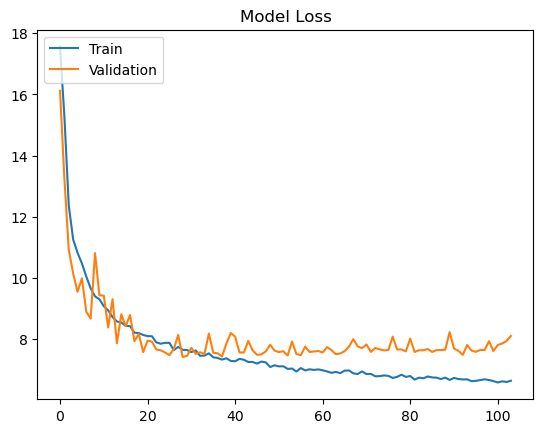

In [30]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')

### Plotting Gender Accuracy

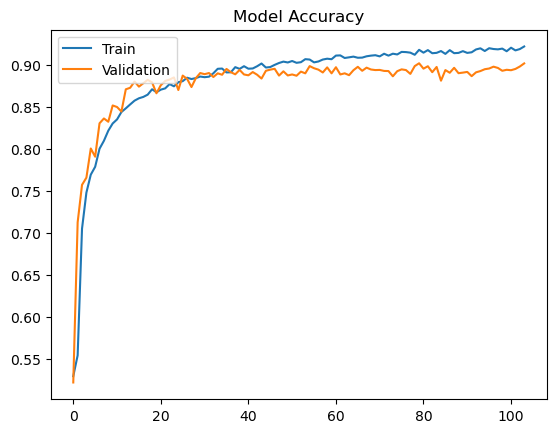

In [31]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')

### Plotting Age Accuracy

TypeError: 'str' object is not callable

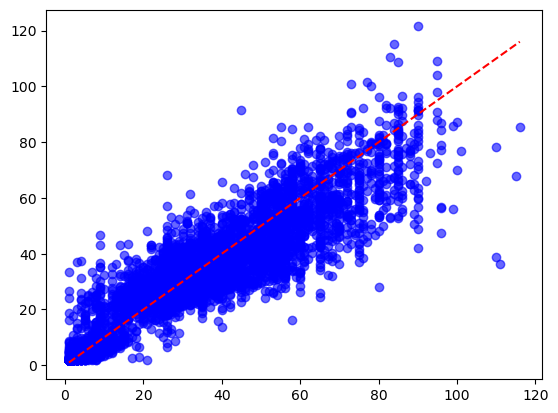

In [32]:
import matplotlib.pyplot as plt

plt.scatter(Y_test_2[1], pred[1], color='blue', alpha=0.6)
plt.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], color='red', linestyle='--')

plt.xlabel('Actual Age')  # Corrected: Call the function, don't assign
plt.ylabel('Predicted Age')  # Corrected: Call the function, don't assign
plt.title('Actual vs Predicted Age')
plt.show()

### Making Report of the Model (Gender Only)

In [33]:
i = 0
pred_g=[]
while (i < len(pred[0])):
    pred_g.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\Satish Patil\AppData\Local\Temp\ipykernel_8752\1428317406.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_g.append(int(np.round(pred[0][i])))


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
report = classification_report(Y_test_2[0], pred_g)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3095
           1       0.84      0.93      0.89      2832

    accuracy                           0.88      5927
   macro avg       0.89      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



In [36]:
results = confusion_matrix(Y_test_2[0], pred_g)

<Axes: >

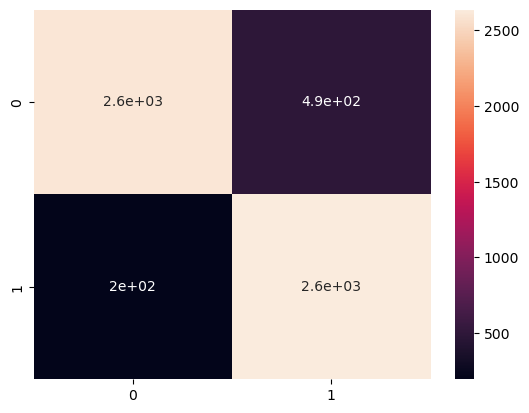

In [37]:
import seaborn as sns
sns.heatmap(results,annot=True)

### Testing The Images Ourself

In [40]:
def test_image(ind):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

#### Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Age is 28
Predicted Gender is Male


C:\Users\Satish Patil\AppData\Local\Temp\ipykernel_8752\3864889987.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Satish Patil\AppData\Local\Temp\ipykernel_8752\3864889987.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


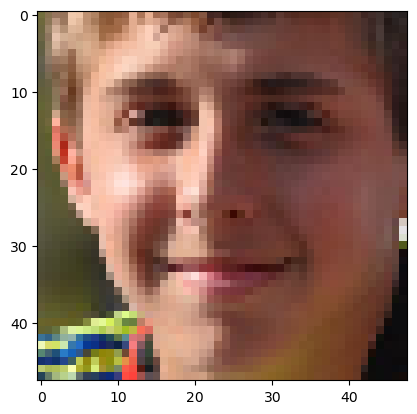

In [41]:
test_image(888)

#### Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Age is 26
Predicted Gender is Female


C:\Users\Satish Patil\AppData\Local\Temp\ipykernel_8752\3864889987.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Satish Patil\AppData\Local\Temp\ipykernel_8752\3864889987.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


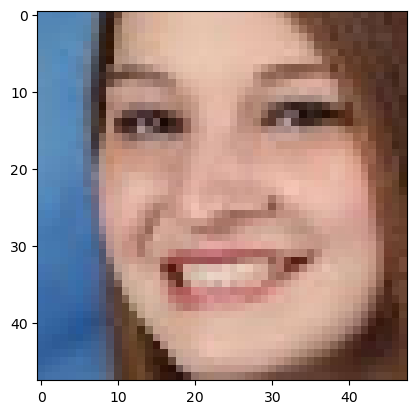

In [42]:
test_image(1288)
